# Домашнее задание к лекции "Визуализация данных"

Содержание задания можно также найти здесь github.com...tion.ipynb

## Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?


## Дополнительная часть (необязательная)

построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

### This dataset contains used car ads from one of the most popular online catalogs in the country (Belarus)

https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog?select=cars.csv

In [2]:
car = pd.read_csv('./data/cars.csv')
car = car[['manufacturer_name',	'model_name',	'transmission',	'color',	'odometer_value',	'year_produced',	'engine_fuel',	'engine_has_gas',	'engine_type',	'engine_capacity']]


In [3]:
first = car[['manufacturer_name']].value_counts()

first

manufacturer_name
Volkswagen           4243
Opel                 2759
BMW                  2610
Ford                 2566
Renault              2493
Audi                 2468
Mercedes-Benz        2237
Peugeot              1909
Citroen              1562
Nissan               1361
Mazda                1328
Toyota               1246
Hyundai              1116
Skoda                1089
Kia                   912
Mitsubishi            887
Fiat                  824
Honda                 797
Volvo                 721
ВАЗ                   481
Chevrolet             436
Chrysler              410
Seat                  303
Dodge                 297
Subaru                291
Rover                 235
Suzuki                234
Daewoo                221
Lexus                 213
Alfa Romeo            207
ГАЗ                   200
Land Rover            184
Infiniti              162
LADA                  146
Iveco                 139
Saab                  108
Jeep                  107
Lancia              

# Plot #1

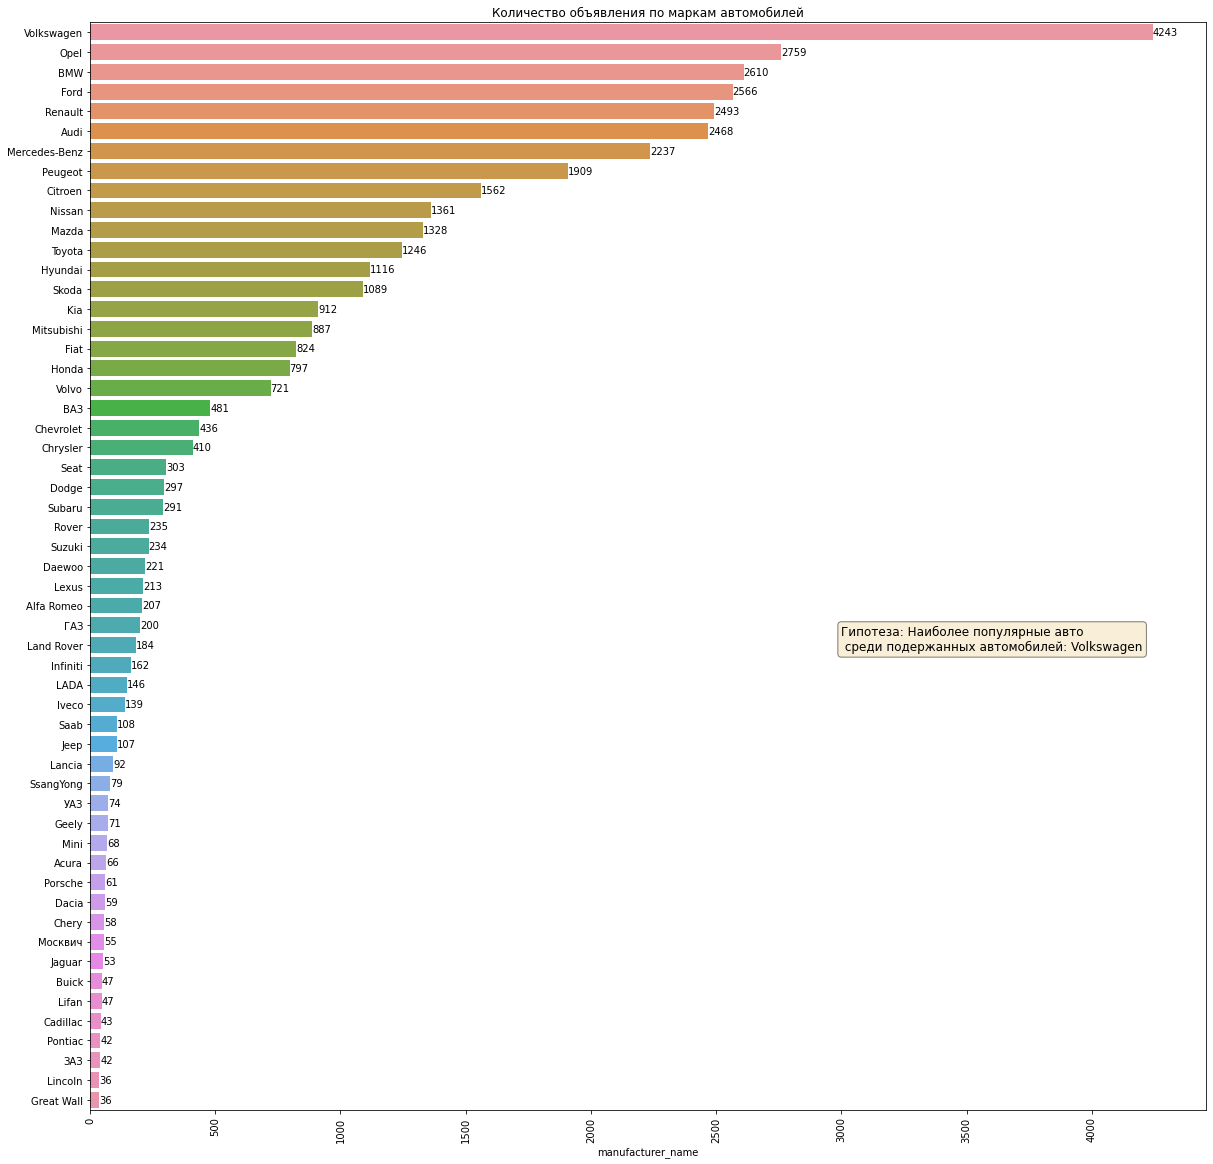

In [5]:
rcParams['figure.figsize'] = 20,20
df_manufacture= car['manufacturer_name'].value_counts()
sns.barplot(y=df_manufacture.index, x=df_manufacture.sort_values(ascending=False), orient = 'h')
for i, val in enumerate(df_manufacture.values):
  plt.text(val, i, int(val), verticalalignment='center')
plt.text(3000, 30,
        'Гипотеза: Наиболее популярные авто \n среди подержанных автомобилей: Volkswagen',
        fontsize=12,
        bbox={'boxstyle':'round', 'facecolor':'wheat', 'alpha':0.5},
        verticalalignment='top')
plt.title('Количество объявления по маркам автомобилей')
plt.xticks(rotation=90)
plt.show()

# Plot #2

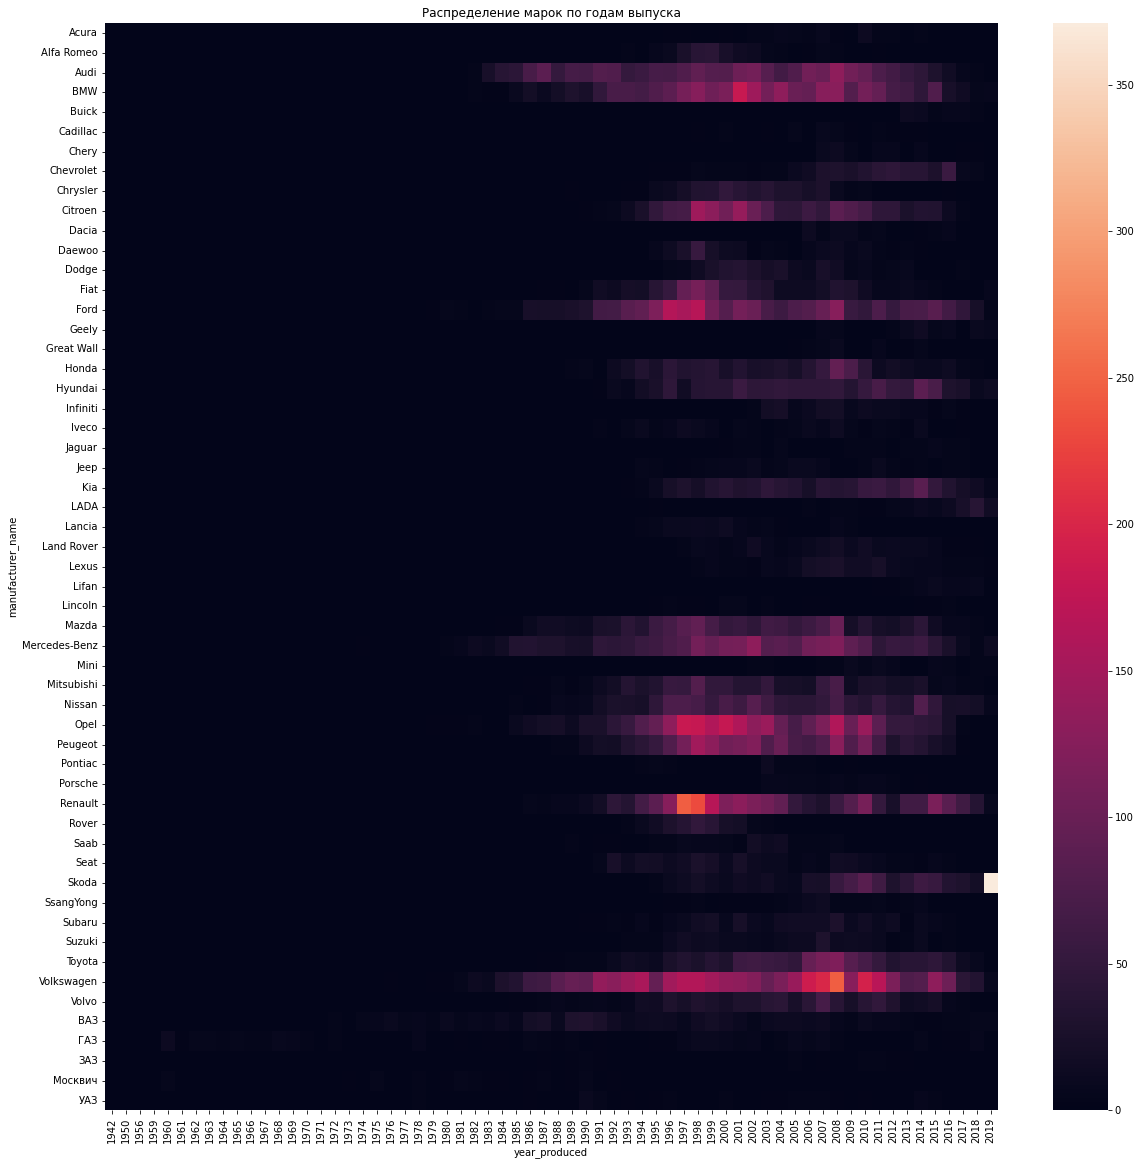

In [6]:
rcParams['figure.figsize'] = 20,20
data= car.pivot_table(
    index='manufacturer_name',
    columns='year_produced',
    values='engine_has_gas',
    aggfunc='count'
).fillna(0)
plt.title('Распределение марок по годам выпуска')
sns.heatmap(data)
plt.show()

Гипотеза: Наиболее подаваемые авто Skoda (2019 г.в.), Renault (1998 и 1999 г.в.) и Volkswagen (2008 г.в)

# Plot #3

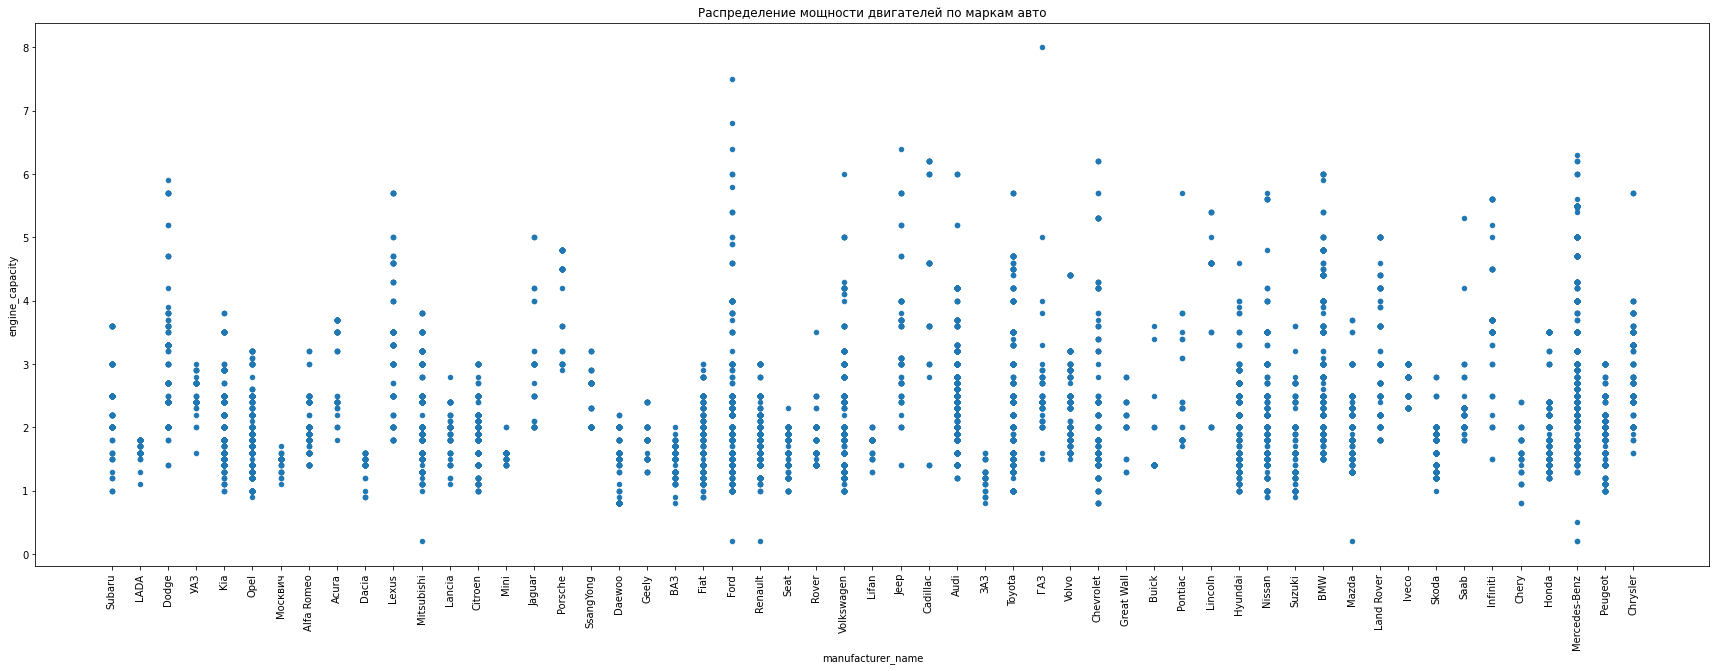

In [7]:
rcParams['figure.figsize'] = 30,10
car.plot(
    kind='scatter',
    x='manufacturer_name',
    y='engine_capacity',
    title='Распределение мощности двигателей по маркам авто'
)
plt.xticks(rotation=90)
plt.show()

Гиоптеза: Основное распределние приходится на двигатели от 1 до 3 литров

# Plot #4

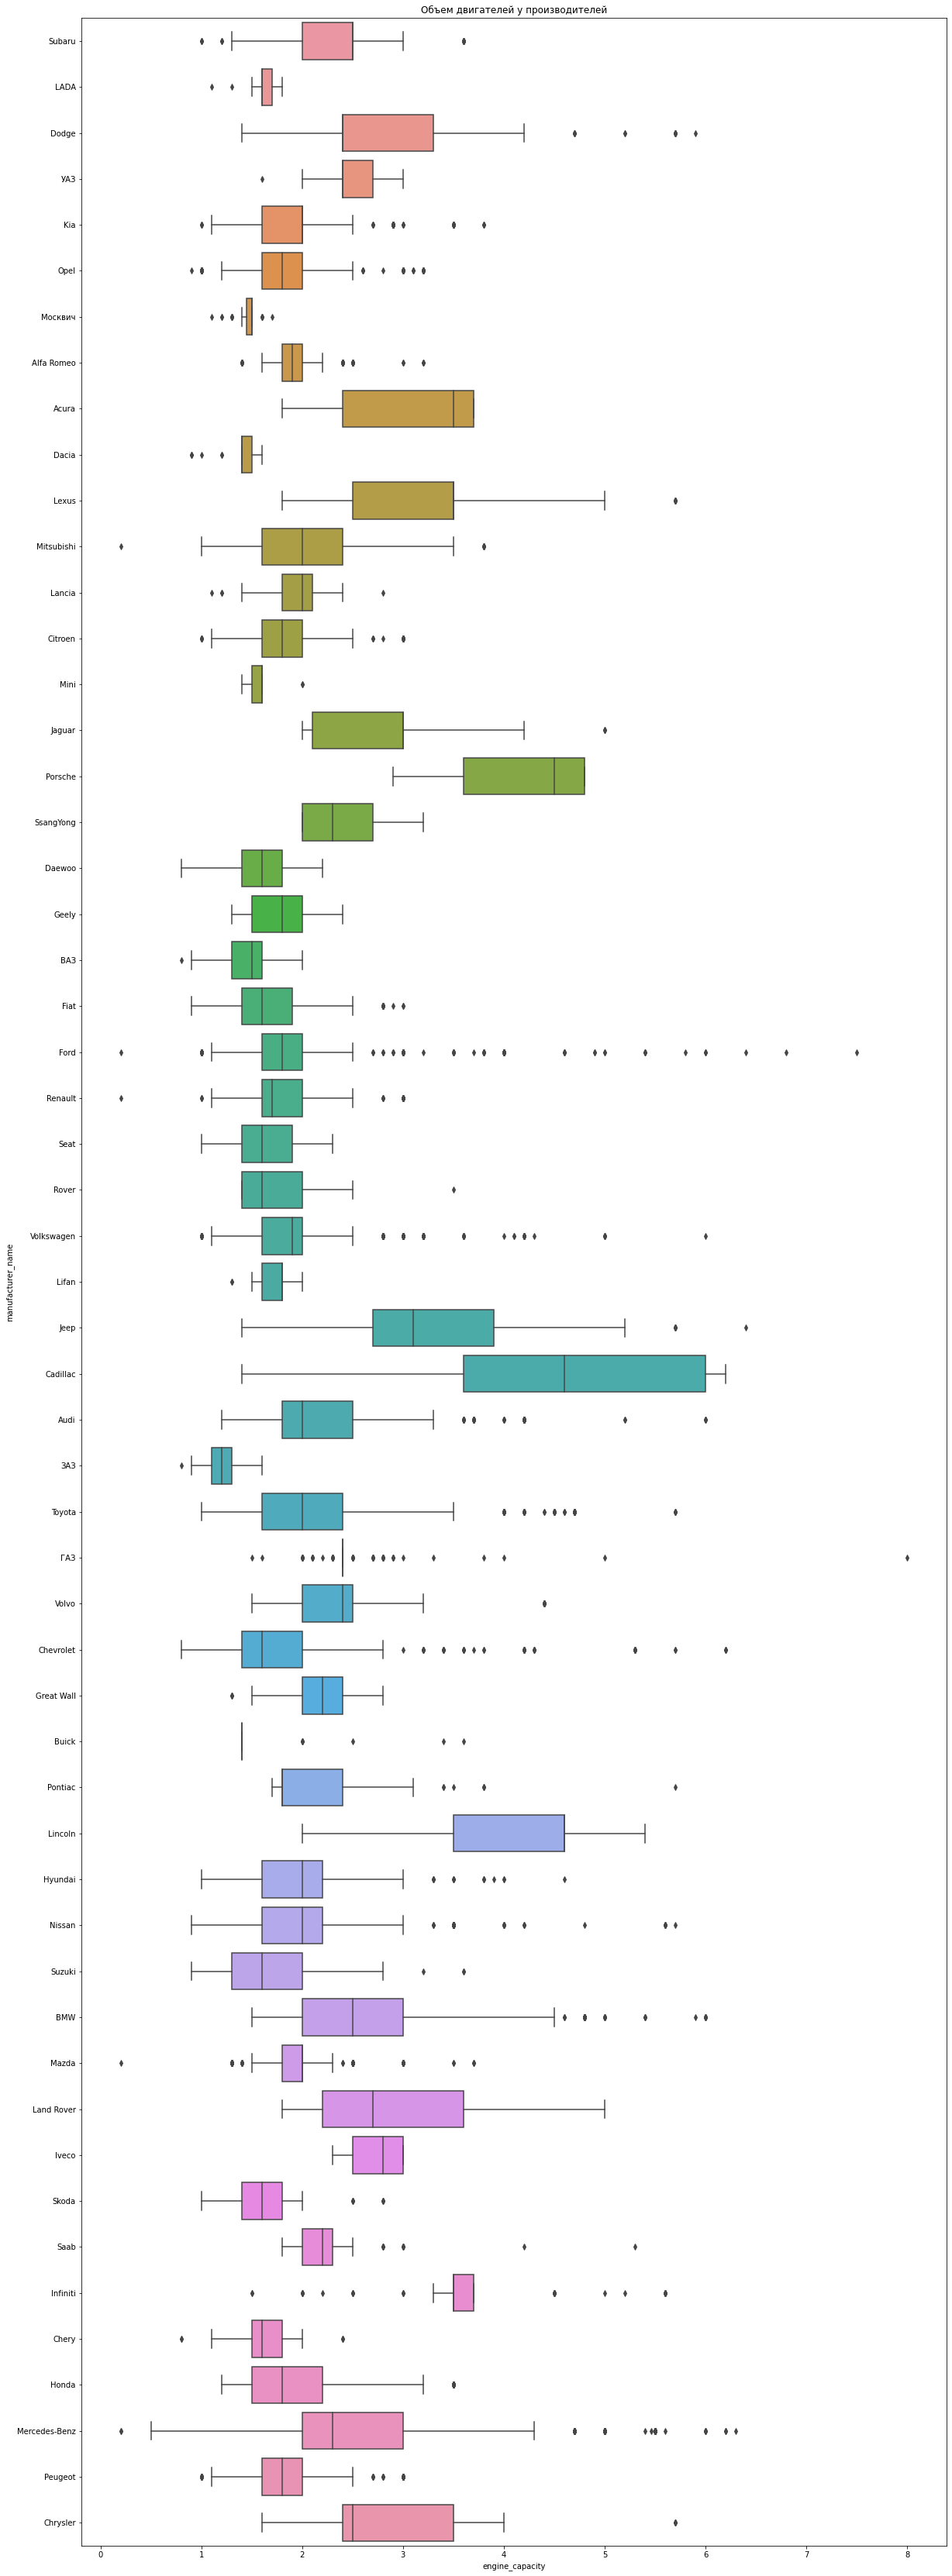

In [ ]:
rcParams['figure.figsize'] = 20,60
sns.boxplot(y=car['manufacturer_name'], x=car['engine_capacity'])
plt.title('Объем двигателей у производителей')
plt.show()

Гипотеза: На графике отлично видно кто производит основную массу автомобилей с большими двигателями

# Plot #5

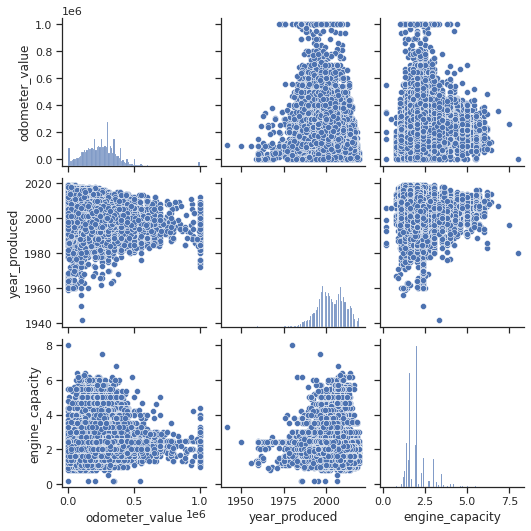

In [ ]:

sns.pairplot(car[['manufacturer_name',	'model_name',	'transmission',	'color',	'odometer_value',	'year_produced',	'engine_fuel',	'engine_type',	'engine_capacity']])
plt.show()

# Plot #6

In [8]:

chrysler = car[car['manufacturer_name'] == 'Chrysler']
vaz = car[car['manufacturer_name'] == 'ВАЗ']


Text(4, 80, 'Гипотеза: Более мощные машины у Крайслера,\n но более массовые у ВАза с 1,6л')

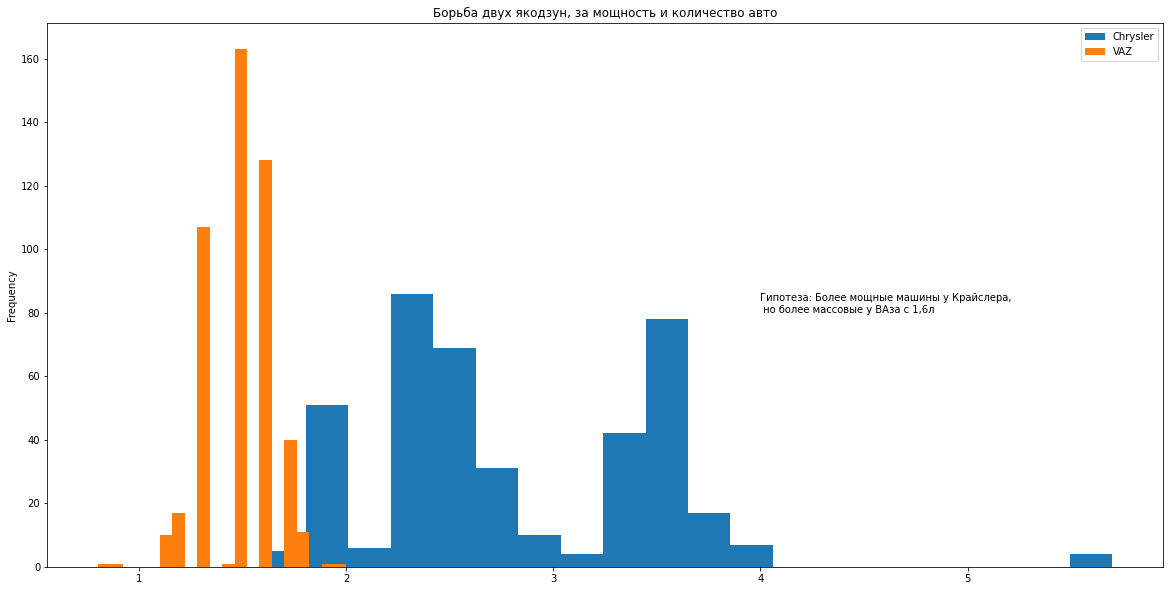

In [9]:
rcParams['figure.figsize'] = 20,10
chrysler['engine_capacity'].plot(kind='hist', bins=20)
vaz['engine_capacity'].plot(kind='hist', bins=20)
plt.legend(loc='upper right', labels=['Chrysler','VAZ'])
plt.title('Борьба двух якодзун, за мощность и количество авто')
plt.text(4, 80, 'Гипотеза: Более мощные машины у Крайслера,\n но более массовые у ВАза с 1,6л' )
